In [1]:
# Description: Plot Figure 3 (1D topography linear stability analysis, varying topographic wavenumber and lateral jet scale).
# Author:      André Palóczy
# E-mail:      paloczy@gmail.com
# Date:        March/2022

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from natsort import natsorted

In [3]:
def pickcolls(f, col1, col2):
    if "flatbottom" in f:
        col = col1
    else:
        col = col2

    if "lt10" in f:
        ls = "dashed"
        lab = r"$l_t = 10\pi$"
    elif "lt50" in f:
        ls = "dotted"
        lab = r"$l_t = 50\pi$"
    else:
        ls = "solid"
        lab = r"Flat bottom"

    return col, ls, lab


def get_label(F1):
    LjonLd = np.sqrt(F1)/5
    if LjonLd==1:
        l = r"$L_j = L_{d1}$"
    elif LjonLd==int(LjonLd):
        l = r"$L_j = %dL_{d1}$"%LjonLd
    else:
        l = r"$L_j = %.1fL_{d1}$"%LjonLd

    return l

In [4]:
plt.close("all")

head = "../../data/"
F1a, F1b, F1c = 25, 75, 400
col1, col2 = "k", "r"
kpmin, kpmax, dxtk = 0, 60, 10

fnamesF1a = natsorted(glob(head+"momthick-F1_%d*.npz"%F1a))
fnamesF1b = natsorted(glob(head+"momthick-F1_%d*.npz"%F1b))
fnamesF1c = natsorted(glob(head+"momthick-F1_%d*.npz"%F1c))

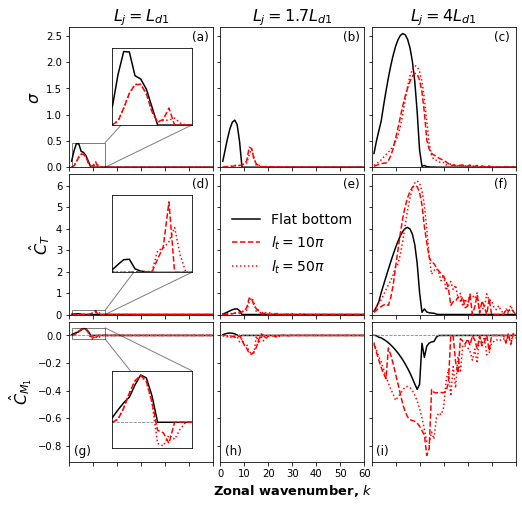

In [5]:
fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey="row", figsize=(8, 8))
ax = ax.T
ax1, ax2, ax3 = ax[0]
ax4, ax5, ax6 = ax[1]
ax7, ax8, ax9 = ax[2]

for f in fnamesF1a:
    d = np.load(f)
    kp, sig, hf, m1 = d["kp"], d["sig"], d["hf"], d["m1"]
    col, ls, lab = pickcolls(f, col1, col2)
    ax1.plot(kp, sig, col, linestyle=ls, label=lab)
    ax2.plot(kp, hf, col, linestyle=ls)
    ax3.plot(kp, m1, col, linestyle=ls)

    # Add inset axes on some panels.
    if f==fnamesF1a[0]:
        axins1 = ax1.inset_axes([0.3, 0.3, 0.55, 0.55])
        x1, x2, y1, y2 = kp[0], 15, 0, 0.47
        axins1.set_xlim(x1, x2); axins1.set_ylim(y1, y2)
        axins1.set_xticks([]); axins1.set_yticks([])
        ax1.indicate_inset_zoom(axins1, edgecolor="black")

        axins2 = ax2.inset_axes([0.3, 0.3, 0.55, 0.55])
        x1, x2, y1, y2 = kp[0], 15, 0, 0.2
        axins2.set_xlim(x1, x2); axins2.set_ylim(y1, y2)
        axins2.set_xticks([]); axins2.set_yticks([])
        ax2.indicate_inset_zoom(axins2, edgecolor="black")

        axins3 = ax3.inset_axes([0.3, 0.1, 0.55, 0.55])
        x1, x2, y1, y2 = kp[0], 15, -0.027, 0.0547
        axins3.set_xlim(x1, x2); axins3.set_ylim(y1, y2)
        axins3.set_xticks([]); axins3.set_yticks([])
        ax3.indicate_inset_zoom(axins3, edgecolor="black")
        axins3.axhline(color="gray", linestyle="dashed", linewidth=0.8)

    axins1.plot(kp, sig, col, linestyle=ls)
    axins2.plot(kp, hf, col, linestyle=ls)
    axins3.plot(kp, m1, col, linestyle=ls)

for f in fnamesF1b:
    d = np.load(f)
    kp, sig, hf, m1 = d["kp"], d["sig"], d["hf"], d["m1"]
    col, ls, lab = pickcolls(f, col1, col2)
    ax4.plot(kp, sig, col, linestyle=ls)
    ax5.plot(kp, hf, col, linestyle=ls, label=lab)
    ax6.plot(kp, m1, col, linestyle=ls)

for f in fnamesF1c:
    d = np.load(f)
    kp, sig, hf, m1 = d["kp"], d["sig"], d["hf"], d["m1"]
    col, ls, _ = pickcolls(f, col1, col2)
    ax7.plot(kp, sig, col, linestyle=ls)
    ax8.plot(kp, hf, col, linestyle=ls)
    ax9.plot(kp, m1, col, linestyle=ls)

ax1.set_ylim(bottom=0); ax2.set_ylim(bottom=0)
ax3.axhline(color="gray", linestyle="dashed", linewidth=0.8)
ax6.axhline(color="gray", linestyle="dashed", linewidth=0.8)
ax9.axhline(color="gray", linestyle="dashed", linewidth=0.8)
ax9.set_xlim(kpmin, kpmax)
ax9.set_xticks(np.arange(kpmin, kpmax+dxtk, dxtk))
kwtxt = dict(fontsize=16, fontweight="black")

ax1.set_ylabel(r"$\sigma$", **kwtxt)
ax2.set_ylabel(r"$\hat{C}_T$", **kwtxt)
ax3.set_ylabel(r"$\hat{C}_{M_1}$", **kwtxt)

xt, yt = 0.85, 0.90
kwtxt = dict(fontsize=12, fontweight="normal")
ax1.text(xt, yt, r"(a)", transform=ax1.transAxes, **kwtxt)
ax2.text(xt, yt, r"(d)", transform=ax2.transAxes, **kwtxt)
ax4.text(xt, yt, r"(b)", transform=ax4.transAxes, **kwtxt)
ax5.text(xt, yt, r"(e)", transform=ax5.transAxes, **kwtxt)
ax7.text(xt, yt, r"(c)", transform=ax7.transAxes, **kwtxt)
ax8.text(xt, yt, r"(f)", transform=ax8.transAxes, **kwtxt)
xtt, ytt = 0.03, 0.05
ax3.text(xtt, ytt, r"(g)", transform=ax3.transAxes, **kwtxt)
ax6.text(xtt, ytt, r"(h)", transform=ax6.transAxes, **kwtxt)
ax9.text(xtt, ytt, r"(i)", transform=ax9.transAxes, **kwtxt)

ax1.set_title(get_label(F1a), fontsize=16)
ax4.set_title(get_label(F1b), fontsize=16)
ax7.set_title(get_label(F1c), fontsize=16)
ax6.set_xlabel(r"Zonal wavenumber, $k$", fontsize=13, fontweight="black")
ax3.tick_params(labelbottom=False); ax9.tick_params(labelbottom=False)
fig.subplots_adjust(hspace=0.05, wspace=0.05)
ax5.legend(loc="center", fontsize=14, frameon=False)

fig.savefig("fig03.png", bbox_inches="tight")

plt.show()